**1.Load the dataset and explore the variables.**

In [1]:
import pandas as pd

customers = pd.read_csv('files_for_lab/customer_churn.csv')
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**2.We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.**

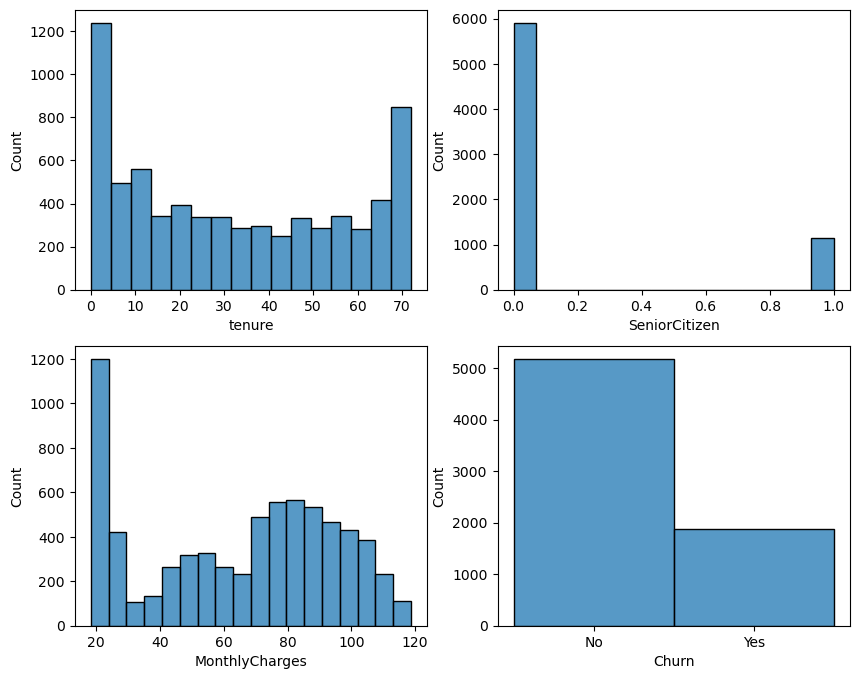

In [2]:
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.histplot(x='tenure', data=customers, ax=ax[0,0])
sns.histplot(x='SeniorCitizen', data=customers, ax=ax[0,1])
sns.histplot(x='MonthlyCharges', data=customers, ax=ax[1,0])
sns.histplot(x='Churn', data=customers, ax=ax[1,1])
plt.show()

In [3]:
print(customers['tenure'].isna().sum())
print(customers['SeniorCitizen'].isna().sum())
print(customers['MonthlyCharges'].isna().sum())
print(customers['Churn'].isna().sum())

0
0
0
0


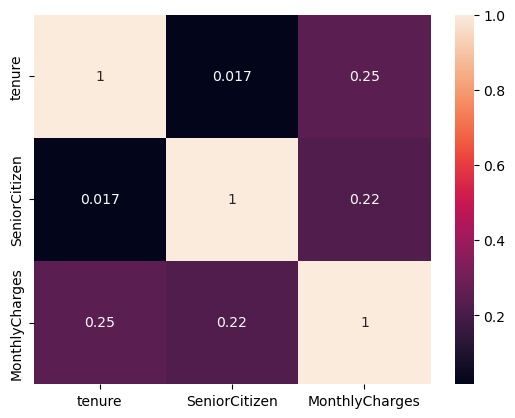

In [4]:
correlations_matrix = customers[['tenure','SeniorCitizen','MonthlyCharges']].corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

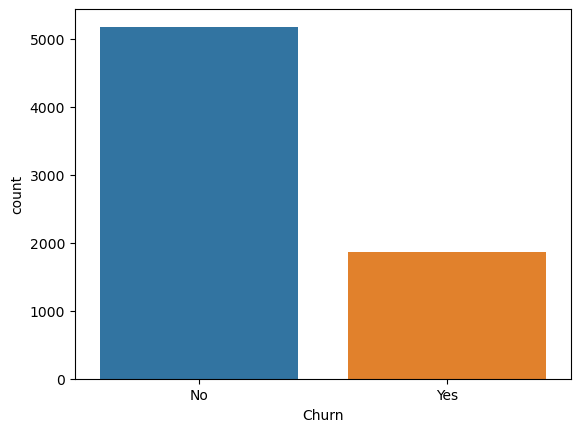

In [5]:
sns.countplot(x = 'Churn', data = customers);
plt.show()

**3.Extract the target variable.**

In [6]:
y = customers['Churn']

**4.Extract the independent variables and scale them.**

In [7]:
X = customers[['tenure','SeniorCitizen','MonthlyCharges']]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

In [9]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized , columns=X_train.columns, index=X_train.index)
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized , columns=X_test.columns, index=X_test.index)

**5.Build the logistic regression model.**

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=87, solver='lbfgs').fit(X_train_norm, y_train)
y_train_pred = lr.predict(X_train_norm)
y_test_pred  = lr.predict(X_test_norm)

**6.Evaluate the model.**

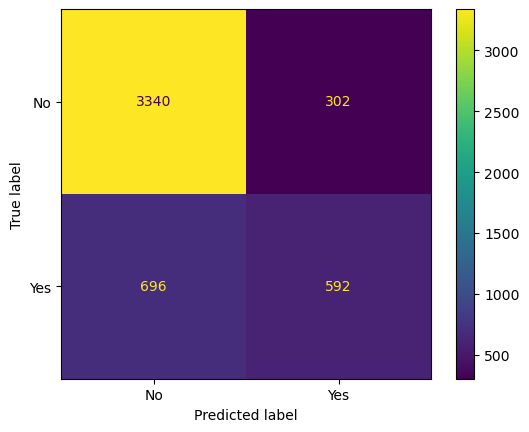

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=lr.classes_);
disp.plot()
plt.show()

In [12]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred, target_names=['A','B']))
print(cohen_kappa_score(y_train, y_train_pred))

The accuracy in the TRAIN set is: 0.798
The accuracy in the TEST  set is: 0.777
              precision    recall  f1-score   support

           A       0.80      0.91      0.86      1532
           B       0.65      0.41      0.50       581

    accuracy                           0.78      2113
   macro avg       0.73      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113

0.41803216250729214


**7.Even a simple model will give us more than 70% accuracy. Why?**

Because accuracy it's not a good metric to evaluate a model, the formula just takes into account True Positive and False Positive and False Positive, but not heavy class imbalance that has the target variable to predict.

**8.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?**

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=87,k_neighbors=6)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm, y_train)

In [14]:
print(X_train.shape)
print(X_train_SMOTE.shape)
print(y_train_SMOTE.value_counts())

(4930, 3)
(7284, 3)
No     3642
Yes    3642
Name: Churn, dtype: int64


In [15]:
lr_imb = LogisticRegression(max_iter=1000, random_state=87).fit(X_train_SMOTE, y_train_SMOTE)
y_test_pred_imb = lr_imb.predict(X_test_norm)
y_train_pred_imb = lr_imb.predict(X_train_norm)

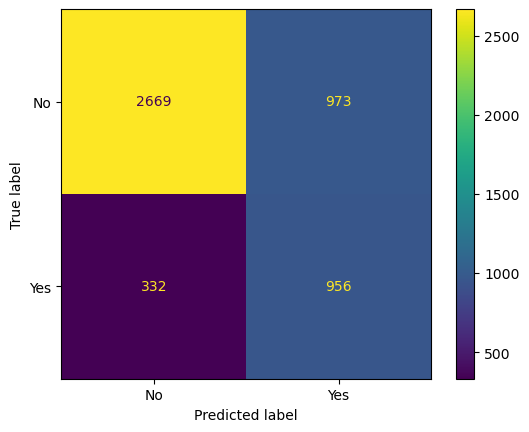

In [16]:
cm_train_imb = confusion_matrix(y_train, y_train_pred_imb)
disp = ConfusionMatrixDisplay(cm_train_imb, display_labels=lr_imb.classes_);
disp.plot()
plt.show()

In [17]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred_imb)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred_imb)))
print(classification_report(y_test, y_test_pred_imb, target_names=['A','B']))
print(cohen_kappa_score(y_train, y_train_pred_imb))

The accuracy in the TRAIN set is: 0.735
The accuracy in the TEST  set is: 0.722
              precision    recall  f1-score   support

           A       0.87      0.73      0.79      1532
           B       0.50      0.71      0.58       581

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.69      2113
weighted avg       0.77      0.72      0.73      2113

0.40925317422029384


No significant improvements in predictions were observed after applying SMOTE.